In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Neural_networks/Dataset/Emoji_Dataset/'

In [ ]:
import pandas as pd

# Load the datasets
test_df = pd.read_csv(path+'test.csv')
test_labels_df = pd.read_csv(path+'test_labels.csv')

# Merge the dataframes on the 'id' column
merged_df = pd.merge(test_df, test_labels_df, on='id')

# Filter rows where all labels are -1 (not annotated)
not_annotated_df = merged_df[(merged_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] == -1).all(axis=1)]

# Drop the class label columns for not annotated data
not_annotated_df = not_annotated_df.drop(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], axis=1)

# Filter rows where at least one label is not -1 (annotated)
annotated_df = merged_df[(merged_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] != -1).any(axis=1)]

# Save the not annotated data to a new CSV file
not_annotated_df.to_csv(path+'not_annotated.csv', index=False)

# Save the annotated data to a new CSV file
annotated_df.to_csv(path+'validate.csv', index=False)

below is used to view the original dataset metrics

Training Data Overview:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
               toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mea

<ipython-input-3-c62136cebcc1>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


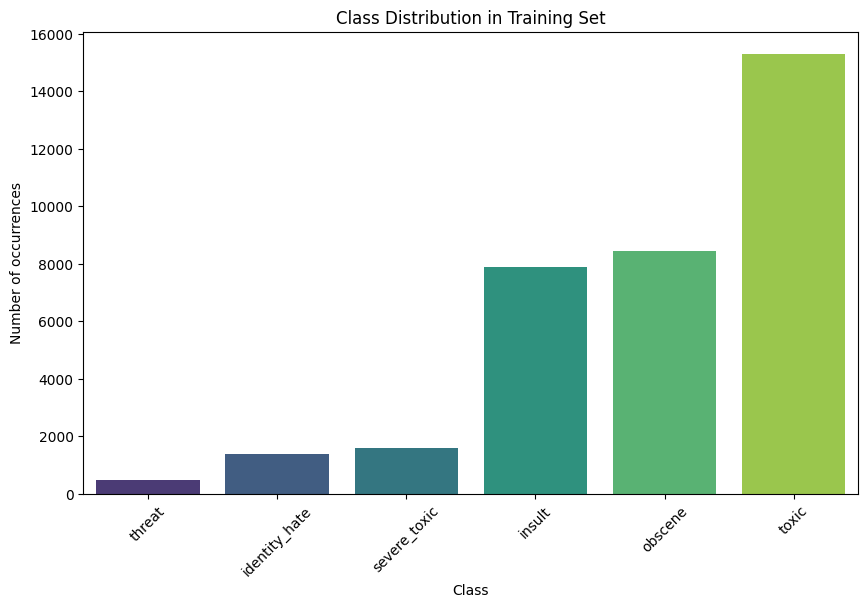

<ipython-input-3-c62136cebcc1>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


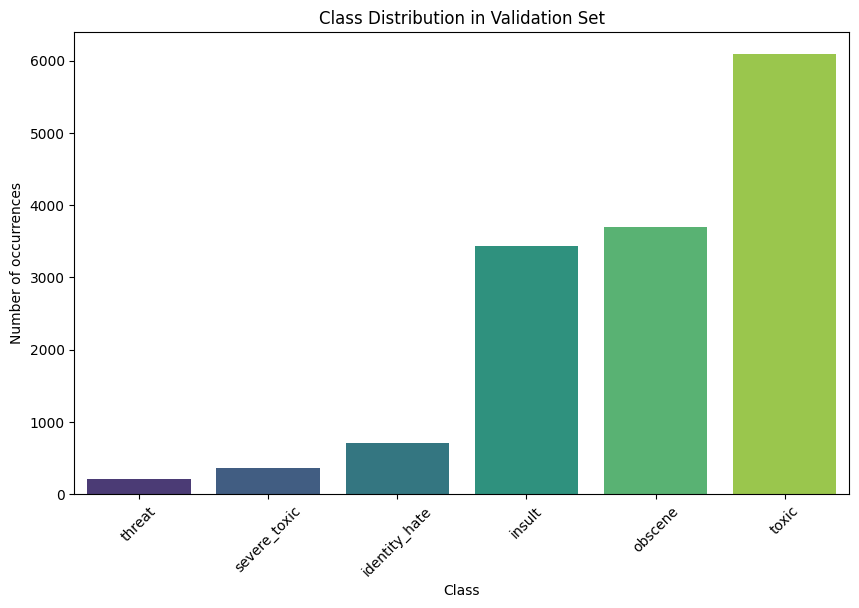

Missing values in training data:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Missing values in validation data:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


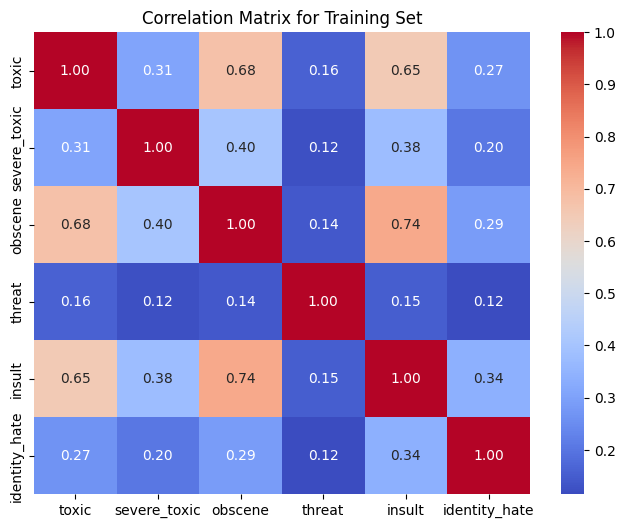

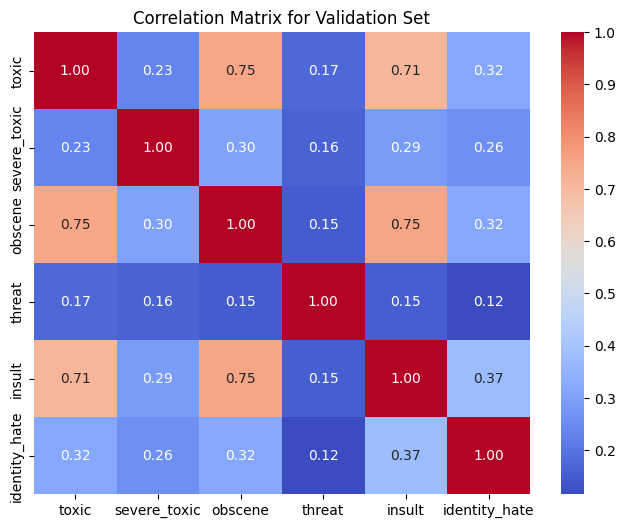

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


input_with_emojis_path = '/content/drive/MyDrive/Neural_networks/Dataset/Emoji_Dataset/'
train_df = pd.read_csv(input_with_emojis_path + 'train.csv')
validate_df = pd.read_csv(input_with_emojis_path + 'validate.csv')


list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

print("Training Data Overview:")
print(train_df.head())
print(train_df.describe())

print("\nValidation Data Overview:")
print(validate_df.head())
print(validate_df.describe())


def plot_class_distribution(df, title):
    counts = df[list_classes].sum().sort_values()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(title)
    plt.ylabel('Number of occurrences')
    plt.xlabel('Class')
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train_df, 'Class Distribution in Training Set')
plot_class_distribution(validate_df, 'Class Distribution in Validation Set')



print("Missing values in training data:")
print(train_df.isnull().sum())

print("\nMissing values in validation data:")
print(validate_df.isnull().sum())



def plot_correlation_matrix(df, title):
    correlation_matrix = df[list_classes].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(title)
    plt.show()

plot_correlation_matrix(train_df, 'Correlation Matrix for Training Set')
plot_correlation_matrix(validate_df, 'Correlation Matrix for Validation Set')